# Mission Communities

Exploring links between missionary residence and place of service

In [2]:
import pandas as pd

### Getting Started

Read in the data:

In [3]:
df = pd.read_csv("mission_data_clean.csv", encoding="utf-8")

df["year"] = df["year"].apply(lambda x:  int(x)) # just in case 
df["new_residence"] = df["new_residence"].apply(lambda x: str(x))
df["City"] = df["City"].apply(lambda x: str(x))

df.head()

,name,birth_place,mission,loc_served,year,type,residence,url,new_residence,City,County,State,Country,Category,Subcategory,latitude,longitude,Subsubcategory,mission_region
0,Lyman Palmer Pinkston,"Salt Lake City, Salt Lake, Utah",Central States Mission,Central States,1931,Proselytizing,"Glendale, California",https://history.churchofjesuschrist.org/chd/in...,"Glendale, Los Angeles, California, United States",Glendale,Los Angeles,California,United States,United States,California,34.146942,-118.247847,California,United States
1,Nelson Daniel Russ,"Alabama, Genesee, New York",Eastern States Mission,Eastern States,1898,Proselytizing,"Wilford, Fremont, Idaho, United States",https://history.churchofjesuschrist.org/chd/in...,"Wilford, Fremont, Idaho, United States",Wilford,Fremont,Idaho,United States,United States,Idaho,43.912690,-111.677739,"Fremont, Idaho",United States
2,Preston Baxter Maughan,"Wellsville, Cache, Utah",Northwestern States (Pacific) Mission,Northwestern States,1919,NaN,"Wellsville, Cache, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Wellsville, Cache, Utah, United States",Wellsville,Cache,Utah,United States,United States,Utah,41.638543,-111.933834,"Cache, Utah",United States
3,Joseph Ezra Wood,"Holden, Millard, Utah",British Mission,British,1912,NaN,"Holden, Millard, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Holden, Millard, Utah, United States",Holden,Millard,Utah,United States,United States,Utah,39.098851,-112.270770,"Millard, Utah",Outside US
4,Jens Wilhelm Olsen,"Asnas, Oshered, Denmark",Danish Mission,Danish,1935,NaN,United States,https://history.churchofjesuschrist.org/chd/in...,United States,nan,NaN,NaN,United States,United States,United States,NaN,NaN,United States,Outside US


Print all residence cities:

In [4]:
cities = [str(df["new_residence"].iloc[i]) for i in range(len(df)) if not str(df["City"].iloc[i]) == "nan"]
cities = sorted(list(set(cities)))

print(len(cities))

for c in cities:
    print(c)
    

1193
Aberdare, Glamorgan, Wales, United Kingdom
Aberdeen, Bingham, Idaho, United States
Abraham, Millard, Utah, United States
Acequia, Minidoka, Idaho, United States
Adamsville, Beaver, Utah, United States
Aetna, Cardston County, Alberta, Canada
Afton, Lincoln, Wyoming, United States
Akron, Summit, Ohio, United States
Alameda, Bannock, Idaho, United States
Alamo, Lincoln, Nevada, United States
Alamosa, Alamosa, Colorado, United States
Albion, Cassia, Idaho, United States
Albuquerque, Bernalillo, New Mexico, United States
Alhambra, Los Angeles, California, United States
Alicel, Union, Oregon, United States
Alliance, Jackson, Florida, United States
Allison, McKinley, New Mexico, United States
Alltwen, Glamorgan, Wales, United Kingdom
Almo, Cassia, Idaho, United States
Almy, Uinta, Wyoming, United States
Alpine, Apache, Arizona, United States
Alpine, Utah, Utah, United States
Alta, Teton, Wyoming, United States
Altha, Calhoun, Florida, United States
Alton, Bear Lake, Idaho, United States


Print all residence regions:

In [6]:
cities = [str(df["Subsubcategory"].iloc[i]) for i in range(len(df))]
cities = sorted(list(set(cities)))

print(len(cities))

for c in cities:
    print(c)

129
Ada, Idaho
Alturas, Idaho
Arizona
Arkansas
Armenia
Australia
Austria
Bannock, Idaho
Bear Lake, Idaho
Beaver, Utah
Bingham, Idaho
Blaine, Idaho
Bonneville, Idaho
Box Elder, Utah
Butte, Idaho
Cache, Utah
California
Camas, Idaho
Canada
Canyon, Idaho
Carbon, Utah
Caribou, Idaho
Cassia, Idaho
Clark, Idaho
Colorado
Custer, Idaho
Daggett, Utah
Davis, Utah
Denmark
District Of Columbia
Duchesne, Utah
Emery, Utah
Florida
France
Franklin, Idaho
Fremont, Idaho
French Polynesia
Garfield, Utah
Garrison, Utah
Gem, Idaho
Georgia
Germany
Gooding, Idaho
Grand, Utah
Hawaii
Holland
Idaho
Idaho, Idaho
Illinois
India
Indiana
Iowa
Ireland
Iron, Utah
Israel
Jefferson, Idaho
Jerome, Idaho
Juab, Utah
Kane, Utah
Kansas
Kentucky
Kootenai, Idaho
Lemhi, Idaho
Lincoln, Idaho
Lincoln, Utah
Madison, Idaho
Maryland
Massachusetts
Mexico
Michigan
Millard, Utah
Minidoka, Idaho
Minnesota
Missouri
Montana
Morgan, Utah
Namibia
Nebraska
Netherlands
Nevada
New Jersey
New Mexico
New York
New Zealand
North Carolina
North Dak

Print all missions:

In [5]:
cities = [str(df["mission"].iloc[i]) for i in range(len(df))]
cities = sorted(list(set(cities)))

print(len(cities))

for c in cities:
    print(c)

78
Argentine Mission
Armenian Mission
Australasian Mission
Australian Mission
Brazilian Mission
British Mission
California Mission
Canadian Mission
Carson Valley Mission
Central Pacific Mission
Central States Mission
Colorado Mission
Czechoslovak Mission
Danish Mission
Danish-Norwegian Mission
Early Church Mission: Asia 
Early Church Mission: Europe 
Early Church Mission: North America 
Early Church Mission: South America 
East Central States Mission
East German Mission
East Indian Mission
Eastern States Mission
Elk Mountain Mission
European Mission
French Mission
German Mission
German and Austrian Mission
Gibraltar Mission
Hawaiian Mission
Hong Kong Mission
Iceland Mission
Indian Territory Mission
Irish Mission
Italian Mission
Jamaica Mission
Japan Mission
Las Vegas Mission
Malta Mission
Mexican Mission
Middle States Mission
Midwives and Nurses Mission
Montana Mission
Netherlands Mission
New England Mission
New Zealand Mission
North Central States Mission
Northern States Mission
North

Load in some mission groupings:

In [7]:
swiss_german_missions = ['German Mission', 'West German Mission', 'German and Austrian Mission',
                         'Swiss and German Mission', 'East German Mission', 'Swiss Mission']
scandinavian_missions = ["Scandinavian Mission", "Danish Mission", "Danish-Norwegian Mission",
                         "Norwegian Mission", "Swedish Mission", "Iceland Mission"]


Load in some helper functions:

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def mission_proportion_list(mission_list, residence_type = "city", year_min = 1850, year_max = 1940):
    """
        List of ratios by community to a given list of missions in the specified year range
        Also provides some summary statistics 
        Filters out communities that only sent 1 missionary total or only 1 to the specified missions
    
        Parameters:
        -- year_min >= 1850
        -- year_max <= 1940 
        -- residence_type:  "city" or "region"
        -- mission_list:  collection (list / tuple) of mission titles to filter by
    
    """
    
    df_years = df[(df["year"] >= year_min) & (df["year"] <= year_max)]
    df_german_missions = df_years[df_years["mission"].isin(mission_list)]
    
    if residence_type == "city":
        residence_type = "new_residence"
    else:
        residence_type = "Subsubcategory"
    
    # get mission cities & their total number of missionaries sent across all missions in the timeframe 
    missionary_cities = set(list(df_german_missions[residence_type]))

    # now find out how many missionaries were sent per residence 
    german_mission_totals = {}
    overall_mission_totals = {}
    ratios = {}

    german = 0
    overall = 0

    for c in missionary_cities:
        german_total = len(df_german_missions[df_german_missions[residence_type] == c])
        overall_total = len(df_years[df_years[residence_type] == c])

        german += german_total
        overall += overall_total

        german_mission_totals[c] = german_total
        overall_mission_totals[c] = overall_total
        ratios[c] = round((german_total / overall_total) * 100, 2)
    
    print(f"Average: {round((german / overall) * 100, 2)} ({german} out of {overall})")

    # weight by overall number of missionaries in the community
    all_ratios = []
    for c in ratios:
        all_ratios += [ratios[c]] * overall_mission_totals[c]
    # all_ratios = [ratios[c] for c in ratios]
    # print(f"{round(np.std(all_ratios), 2)}: Standard Deviation (?)")
    q50 = np.quantile(all_ratios, 0.50)
    q75 = np.quantile(all_ratios, 0.75)
    print(f"50th Quantile (Median): {q50}")
    print(f"75th Quantile: {q75}")
    print(f"95th Quantile: {np.quantile(all_ratios, 0.95)}")
    print(f"99th Quantile: {np.quantile(all_ratios, 0.99)}")
    print()

    ratio_list = [(ratios[c], c) for c in ratios]
    ratio_list.sort(reverse=True)

    for r in ratio_list:
        if overall_mission_totals[r[1]] > 1 and german_mission_totals[r[1]] > 1:
            print(f"{r[0]} ({german_mission_totals[r[1]]} out of {overall_mission_totals[r[1]]}): {r[1]}")

def mission_histogram(mission_list, mission_label, city, city_label, year_min = 1850, year_max = 1940):

    df_years = df[(df["year"] >= year_min) & (df["year"] <= year_max) & (df["new_residence"] == city)]
    df_german_missions = df_years[df_years["mission"].isin(mission_list)]

    fig, ax = plt.subplots()

    years = list(range(year_min, year_max + 1))
    vals = [len(df_years[df_years["year"] == x]) for x in years]
    vals2 = [len(df_german_missions[df_german_missions["year"] == x]) for x in years]

    ax.bar(years, vals, color="lightgray", label="Total")
    ax.bar(years, vals2, color="tab:blue", label=mission_label)

    ax.legend()
    ax.set_title(f"Missionaries from {city_label}")

    ax.spines[["left", "top", "right"]].set_visible(False)
    ax.grid(axis="y", linestyle="--")
    ax.tick_params(axis="y", length = 0)


    plt.show()

### German Missions

Cities sending missionarys to Switzerland and Germany, 1850 to 1900:

In [9]:
mission_proportion_list(swiss_german_missions, "city", 1850, 1900)

Average: 7.33 (626 out of 8535)
50th Quantile (Median): 7.35
75th Quantile: 8.38
95th Quantile: 12.2
99th Quantile: 57.69

100.0 (2 out of 2): Switzerland
100.0 (2 out of 2): Piedmont, Uinta, Wyoming, United States
100.0 (2 out of 2): Fremont, Idaho, United States
100.0 (4 out of 4): Bern, Bear Lake, Idaho, United States
77.78 (7 out of 9): Eureka, Utah, Utah, United States
75.0 (3 out of 4): Geneva, Bear Lake, Idaho, United States
75.0 (3 out of 4): Bedford, Lincoln, Wyoming, United States
73.08 (19 out of 26): Santa Clara, Washington, Utah, United States
66.67 (2 out of 3): Colonia Pacheco, Chihuahua, Mexico
66.67 (2 out of 3): Apache, Arizona, United States
57.69 (15 out of 26): Midway, Wasatch, Utah, United States
54.35 (25 out of 46): Providence, Cache, Utah, United States
25.0 (2 out of 8): Star Valley, Lincoln, Wyoming, United States
25.0 (2 out of 8): Price, Emery, Utah, United States
22.22 (2 out of 9): Garden City, Rich, Utah, United States
20.0 (7 out of 35): Toquerville, Wa

Residence regions sending missionaries to Switzerland and Germany, 1850 to 1900:

In [10]:
mission_proportion_list(swiss_german_missions, "region", 1850, 1900)

Average: 5.25 (626 out of 11926)
50th Quantile (Median): 5.6
75th Quantile: 7.02
95th Quantile: 11.23
99th Quantile: 16.67

100.0 (3 out of 3): Switzerland
17.27 (19 out of 110): Wasatch, Utah
12.13 (41 out of 338): Washington, Utah
11.23 (31 out of 276): Bear Lake, Idaho
9.57 (9 out of 94): Wyoming
9.09 (4 out of 44): Fremont, Idaho
8.89 (4 out of 45): Mexico
7.5 (75 out of 1000): Cache, Utah
7.02 (204 out of 2906): Salt Lake, Utah
6.9 (4 out of 58): Madison, Idaho
5.6 (65 out of 1160): Utah, Utah
5.13 (2 out of 39): Nevada
4.42 (14 out of 317): Sevier, Utah
4.42 (5 out of 113): Morgan, Utah
4.4 (19 out of 432): Box Elder, Utah
4.35 (2 out of 46): Caribou, Idaho
4.01 (30 out of 748): Weber, Utah
3.96 (4 out of 101): Emery, Utah
3.52 (7 out of 199): Juab, Utah
3.32 (19 out of 572): Sanpete, Utah
3.12 (2 out of 64): Uintah, Utah
3.05 (5 out of 164): United States
2.74 (8 out of 292): Arizona
2.6 (2 out of 77): Rich, Utah
2.27 (4 out of 176): Iron, Utah
1.91 (3 out of 157): Summit, Utah


Residence cities sending missionaries to Switzerland and Germany, 1900 to 1940:

Average: 10.26 (3036 out of 29587)
50th Quantile (Median): 10.09
75th Quantile: 14.27
95th Quantile: 20.3
99th Quantile: 30.0

100.0 (3 out of 3): Milwaukee, Milwaukee, Wisconsin, United States
100.0 (3 out of 3): Kaliningrad, Kaliningrad, Russia
50.0 (2 out of 4): Littleton, Morgan, Utah, United States
47.62 (10 out of 21): Geneva, Bear Lake, Idaho, United States
40.0 (2 out of 5): Littlefield, Mohave, Arizona, United States
40.0 (2 out of 5): Germany
38.75 (31 out of 80): Midway, Wasatch, Utah, United States
38.1 (8 out of 21): Santa Clara, Washington, Utah, United States
33.33 (2 out of 6): Washington, District Of Columbia, United States
33.33 (3 out of 9): Bates, Teton, Idaho, United States
32.47 (25 out of 77): Providence, Cache, Utah, United States
30.0 (3 out of 10): College Ward, Cache, Utah, United States
28.57 (6 out of 21): Bern, Bear Lake, Idaho, United States
27.38 (207 out of 756): Unknown
25.0 (3 out of 12): Pine Valley, Washington, Utah, United States
23.61 (17 out of 7

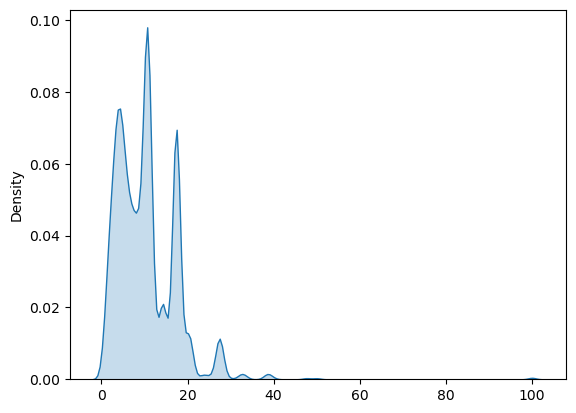

In [21]:
mission_proportion_list(swiss_german_missions, "city", 1900, 1940)

Residence cities sending missionaries to Switzerland and Germany, 1850 to 1940:

Average: 9.02 (3615 out of 40068)
50th Quantile (Median): 8.7
75th Quantile: 14.41
95th Quantile: 16.42
99th Quantile: 33.33

100.0 (2 out of 2): Piedmont, Uinta, Wyoming, United States
100.0 (3 out of 3): Milwaukee, Milwaukee, Wisconsin, United States
100.0 (3 out of 3): Kaliningrad, Kaliningrad, Russia
66.67 (2 out of 3): Switzerland
56.52 (26 out of 46): Santa Clara, Washington, Utah, United States
50.0 (3 out of 6): Littlefield, Mohave, Arizona, United States
50.0 (12 out of 24): Geneva, Bear Lake, Idaho, United States
43.27 (45 out of 104): Midway, Wasatch, Utah, United States
41.18 (49 out of 119): Providence, Cache, Utah, United States
40.0 (10 out of 25): Bern, Bear Lake, Idaho, United States
33.33 (2 out of 6): Washington, District Of Columbia, United States
33.33 (2 out of 6): Germany
33.33 (3 out of 9): Bates, Teton, Idaho, United States
28.57 (16 out of 56): Eureka, Utah, Utah, United States
25.0 (4 out of 16): Rosette, Box Elder, Utah, United States
25.0 (3 out of 12): Col

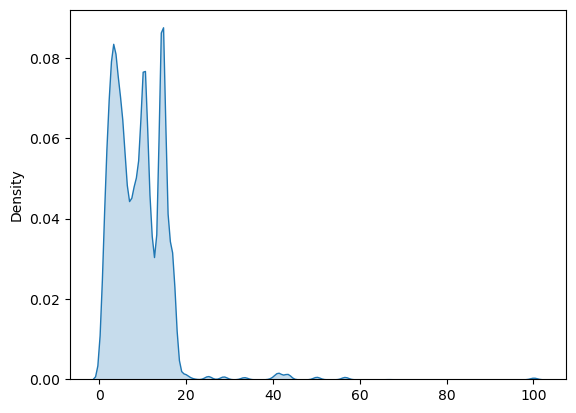

In [22]:
mission_proportion_list(swiss_german_missions, "city", 1850, 1940)

### Scandinavia

In [11]:
mission_proportion_list(scandinavian_missions, "city", 1850, 1900)

Average: 14.12 (1445 out of 10237)
50th Quantile (Median): 8.16
75th Quantile: 18.6
95th Quantile: 44.26
99th Quantile: 72.9

100.0 (11 out of 11): Sweden
100.0 (2 out of 2): Stockholm, Stockholm, Sweden
100.0 (2 out of 2): Rabbit Valley, Wayne, Utah, United States
100.0 (2 out of 2): Oslo, Norway
100.0 (9 out of 9): Denmark
100.0 (20 out of 20): Copenhagen, Copenhagen, Denmark
100.0 (2 out of 2): Centerfield, Sanpete, Utah, United States
87.5 (14 out of 16): Mantua, Box Elder, Utah, United States
80.0 (4 out of 5): Leamington, Millard, Utah, United States
80.0 (4 out of 5): Grover, Lincoln, Wyoming, United States
75.0 (9 out of 12): Redmond, Sevier, Utah, United States
72.9 (78 out of 107): Ephraim, Sanpete, Utah, United States
66.67 (10 out of 15): Ovid, Bear Lake, Idaho, United States
66.67 (2 out of 3): Labelle, Jefferson, Idaho, United States
63.64 (14 out of 22): Mayfield, Sanpete, Utah, United States
63.64 (14 out of 22): Bear River City, Box Elder, Utah, United States
62.16 (23

In [12]:
mission_proportion_list(scandinavian_missions, "region", 1850, 1900)

Average: 11.84 (1445 out of 12201)
50th Quantile (Median): 9.33
75th Quantile: 12.19
95th Quantile: 43.53
99th Quantile: 43.53

100.0 (14 out of 14): Sweden
100.0 (4 out of 4): Norway
96.88 (31 out of 32): Denmark
43.53 (249 out of 572): Sanpete, Utah
25.55 (81 out of 317): Sevier, Utah
19.3 (193 out of 1000): Cache, Utah
18.75 (81 out of 432): Box Elder, Utah
13.79 (32 out of 232): Tooele, Utah
13.79 (8 out of 58): Madison, Idaho
13.46 (7 out of 52): Wayne, Utah
12.9 (4 out of 31): Bingham, Idaho
12.87 (13 out of 101): Emery, Utah
12.19 (39 out of 320): Franklin, Idaho
11.96 (33 out of 276): Bear Lake, Idaho
11.56 (23 out of 199): Juab, Utah
11.23 (84 out of 748): Weber, Utah
11.11 (5 out of 45): Mexico
10.43 (121 out of 1160): Utah, Utah
9.33 (271 out of 2906): Salt Lake, Utah
8.7 (4 out of 46): Bannock, Idaho
8.51 (8 out of 94): Wyoming
8.18 (9 out of 110): Wasatch, Utah
6.52 (3 out of 46): Caribou, Idaho
6.37 (10 out of 157): Summit, Utah
6.25 (4 out of 64): Uintah, Utah
6.19 (7 ou

In [13]:
# 20th century

mission_proportion_list(scandinavian_missions, "city", 1900, 1940)

Average: 7.79 (2276 out of 29212)
50th Quantile (Median): 5.79
75th Quantile: 8.49
95th Quantile: 20.19
99th Quantile: 35.9

100.0 (3 out of 3): Vernon, Fremont, Idaho, United States
66.67 (2 out of 3): Axtell, Sanpete, Utah, United States
50.0 (2 out of 4): Tilden, Bingham, Idaho, United States
50.0 (2 out of 4): Greenville, Cache, Utah, United States
50.0 (2 out of 4): Fort Bridger, Uinta, Wyoming, United States
45.45 (5 out of 11): Scofield, Carbon, Utah, United States
42.86 (18 out of 42): Levan, Juab, Utah, United States
40.74 (11 out of 27): Mayfield, Sanpete, Utah, United States
40.54 (30 out of 74): Mink Creek, Franklin, Idaho, United States
40.0 (2 out of 5): Virginia, Bannock, Idaho, United States
40.0 (2 out of 5): Preston, White Pine, Nevada, United States
40.0 (2 out of 5): Manila, Daggett, Utah, United States
40.0 (4 out of 10): Independence, Madison, Idaho, United States
37.5 (12 out of 32): Elsinore, Sevier, Utah, United States
35.9 (14 out of 39): Centerfield, Sanpete,

In [14]:
# 20th century

mission_proportion_list(scandinavian_missions, "region", 1900, 1940)

Average: 6.29 (2276 out of 36181)
50th Quantile (Median): 5.69
75th Quantile: 8.62
95th Quantile: 12.7
99th Quantile: 17.53

66.67 (2 out of 3): Massachusetts
60.0 (3 out of 5): Sweden
40.0 (2 out of 5): Daggett, Utah
25.0 (3 out of 12): Minnesota
17.53 (173 out of 987): Sanpete, Utah
14.38 (90 out of 626): Sevier, Utah
14.29 (2 out of 14): Jerome, Idaho
12.7 (153 out of 1205): Box Elder, Utah
10.22 (216 out of 2113): Cache, Utah
10.2 (10 out of 98): Carbon, Utah
10.14 (37 out of 365): Emery, Utah
9.06 (23 out of 254): Juab, Utah
8.62 (493 out of 5722): Salt Lake, Utah
8.28 (28 out of 338): Tooele, Utah
7.92 (84 out of 1060): Franklin, Idaho
7.87 (27 out of 343): Bannock, Idaho
7.32 (12 out of 164): Caribou, Idaho
6.6 (128 out of 1939): Weber, Utah
6.14 (146 out of 2378): Utah, Utah
5.69 (229 out of 4023): United States
5.66 (31 out of 548): Bingham, Idaho
5.11 (36 out of 705): Madison, Idaho
5.1 (8 out of 157): Wayne, Utah
5.08 (10 out of 197): Oregon
4.94 (4 out of 81): Twin Falls, I

In [15]:
# combined

mission_proportion_list(scandinavian_missions, "city")

Average: 8.81 (3623 out of 41103)
50th Quantile (Median): 6.78
75th Quantile: 8.42
95th Quantile: 25.64
99th Quantile: 45.34

100.0 (3 out of 3): Vernon, Fremont, Idaho, United States
100.0 (2 out of 2): Stockholm, Stockholm, Sweden
100.0 (2 out of 2): Rabbit Valley, Wayne, Utah, United States
100.0 (20 out of 20): Copenhagen, Copenhagen, Denmark
90.91 (10 out of 11): Denmark
85.71 (12 out of 14): Sweden
66.67 (2 out of 3): Axtell, Sanpete, Utah, United States
55.26 (21 out of 38): Mantua, Box Elder, Utah, United States
50.0 (2 out of 4): Tilden, Bingham, Idaho, United States
50.0 (2 out of 4): Oslo, Norway
50.0 (24 out of 48): Mayfield, Sanpete, Utah, United States
50.0 (2 out of 4): Fort Bridger, Uinta, Wyoming, United States
46.55 (27 out of 58): Elsinore, Sevier, Utah, United States
45.45 (30 out of 66): Levan, Juab, Utah, United States
45.34 (107 out of 236): Ephraim, Sanpete, Utah, United States
44.9 (22 out of 49): Redmond, Sevier, Utah, United States
43.62 (41 out of 94): Mink 

Focus on Ephraim, Utah:

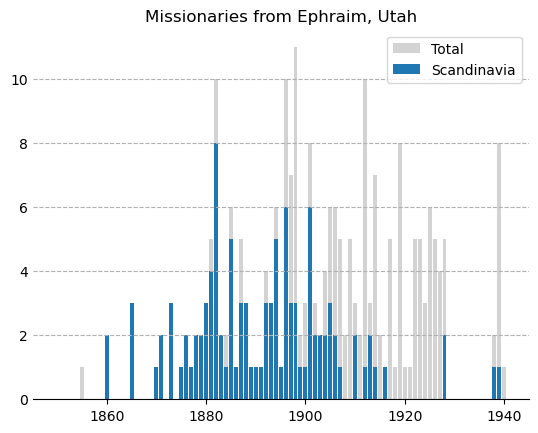

In [19]:
mission_histogram(scandinavian_missions, "Scandinavia", "Ephraim, Sanpete, Utah, United States", "Ephraim, Utah")

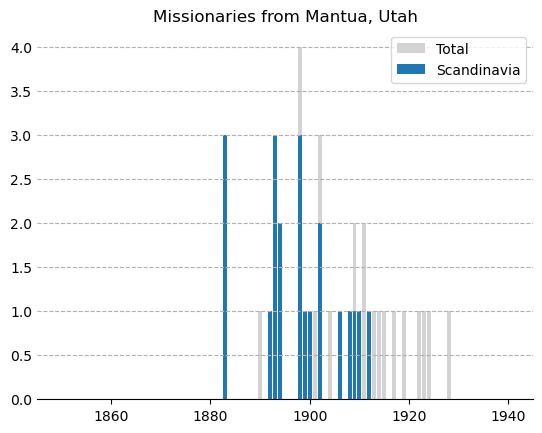

In [8]:
mission_histogram(scandinavian_missions, "Scandinavia", "Mantua, Box Elder, Utah, United States", "Mantua, Utah")

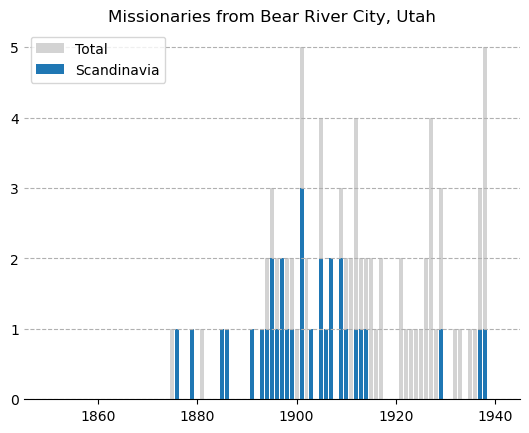

In [10]:
mission_histogram(scandinavian_missions, "Scandinavia", "Bear River City, Box Elder, Utah, United States", "Bear River City, Utah")

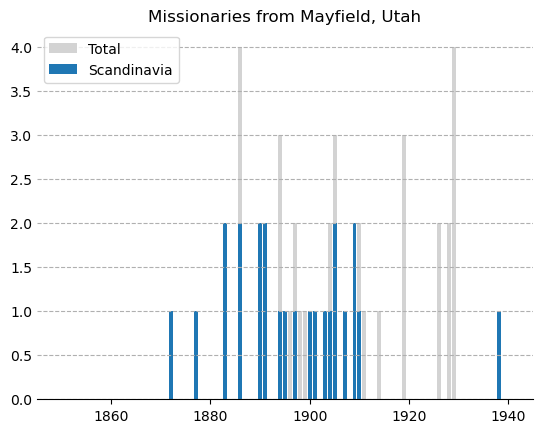

In [11]:
mission_histogram(scandinavian_missions, "Scandinavia", "Mayfield, Sanpete, Utah, United States", "Mayfield, Utah")

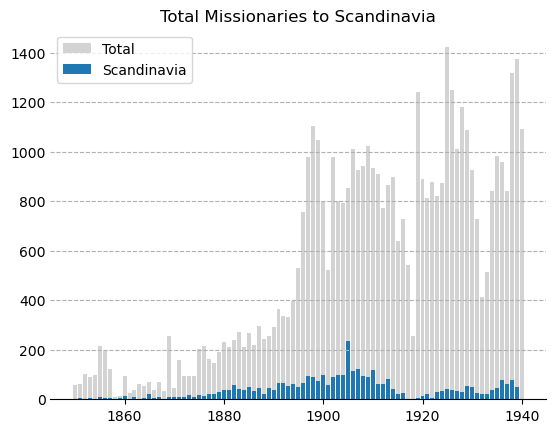

In [12]:
# Missionaries to Scandinavia

year_min = 1850
year_max = 1940

df_years = df[(df["year"] >= year_min) & (df["year"] <= year_max)]
df_german_missions = df_years[df_years["mission"].isin(scandinavian_missions)]

fig, ax = plt.subplots()

years = list(range(year_min, year_max + 1))
vals = [len(df_years[df_years["year"] == x]) for x in years]
vals2 = [len(df_german_missions[df_german_missions["year"] == x]) for x in years]

ax.bar(years, vals, color="lightgray", label="Total")
ax.bar(years, vals2, color="tab:blue", label="Scandinavia")

ax.legend()
ax.set_title("Total Missionaries to Scandinavia")

ax.spines[["left", "top", "right"]].set_visible(False)
ax.grid(axis="y", linestyle="--")
ax.tick_params(axis="y", length = 0)


plt.show()

### Hawaiian Mission

In [20]:
mission_proportion_list(["Hawaiian Mission"], "region", 1850, 1900)

Average: 2.52 (271 out of 10738)
50th Quantile (Median): 2.33
75th Quantile: 3.37
95th Quantile: 4.36
99th Quantile: 8.28

50.0 (2 out of 4): Hawaii
33.33 (7 out of 21): California
8.28 (13 out of 157): Summit, Utah
5.45 (3 out of 55): Utah
4.36 (24 out of 551): Unknown
4.35 (2 out of 46): Bannock, Idaho
4.14 (14 out of 338): Washington, Utah
3.45 (8 out of 232): Tooele, Utah
3.37 (98 out of 2906): Salt Lake, Utah
3.02 (6 out of 199): Juab, Utah
2.5 (8 out of 320): Franklin, Idaho
2.46 (6 out of 244): Millard, Utah
2.33 (27 out of 1160): Utah, Utah
1.89 (6 out of 317): Sevier, Utah
1.83 (3 out of 164): United States
1.77 (2 out of 113): Morgan, Utah
1.63 (8 out of 492): Davis, Utah
1.2 (9 out of 748): Weber, Utah
1.03 (3 out of 292): Arizona
1.0 (10 out of 1000): Cache, Utah
0.7 (4 out of 572): Sanpete, Utah
0.46 (2 out of 432): Box Elder, Utah


### British Isles

In [21]:
british_missions = ["British Mission", "Welsh Mission", "Irish Mission"]

mission_proportion_list(british_missions, "region", 1850, 1900)

Average: 23.17 (2867 out of 12372)
50th Quantile (Median): 23.62
75th Quantile: 30.11
95th Quantile: 33.17
99th Quantile: 57.32

90.91 (70 out of 77): United Kingdom
57.32 (94 out of 164): United States
50.0 (7 out of 14): Carbon, Utah
45.19 (47 out of 104): Beaver, Utah
43.64 (24 out of 55): Utah
40.0 (16 out of 40): Oneida, Idaho
33.17 (66 out of 199): Juab, Utah
31.21 (49 out of 157): Summit, Utah
30.11 (875 out of 2906): Salt Lake, Utah
28.12 (18 out of 64): Uintah, Utah
27.87 (68 out of 244): Millard, Utah
26.7 (47 out of 176): Iron, Utah
25.81 (127 out of 492): Davis, Utah
24.87 (186 out of 748): Weber, Utah
24.07 (13 out of 54): Bonneville, Idaho
23.62 (274 out of 1160): Utah, Utah
23.08 (3 out of 13): New Mexico
23.01 (26 out of 113): Morgan, Utah
21.1 (211 out of 1000): Cache, Utah
20.51 (113 out of 551): Unknown
20.37 (88 out of 432): Box Elder, Utah
19.2 (53 out of 276): Bear Lake, Idaho
18.87 (10 out of 53): Jefferson, Idaho
18.75 (3 out of 16): Oregon
18.18 (14 out of 77):

In [22]:
# 20th century

mission_proportion_list(british_missions, "region", 1900, 1940)

Average: 9.49 (3443 out of 36283)
50th Quantile (Median): 9.81
75th Quantile: 13.16
95th Quantile: 14.3
99th Quantile: 17.97

100.0 (5 out of 5): United Kingdom
100.0 (4 out of 4): France
63.64 (7 out of 11): South Africa
50.0 (2 out of 4): Pennsylvania
17.97 (172 out of 957): Davis, Utah
16.33 (16 out of 98): Carbon, Utah
15.38 (2 out of 13): Netherlands
14.3 (818 out of 5722): Salt Lake, Utah
14.19 (21 out of 148): Rich, Utah
13.66 (22 out of 161): Morgan, Utah
13.16 (278 out of 2113): Cache, Utah
12.99 (33 out of 254): Juab, Utah
12.69 (25 out of 197): Oregon
12.12 (146 out of 1205): Box Elder, Utah
12.07 (234 out of 1939): Weber, Utah
11.39 (92 out of 808): Canada
11.11 (2 out of 18): Missouri
11.08 (43 out of 388): Summit, Utah
11.06 (263 out of 2378): Utah, Utah
10.22 (64 out of 626): Bear Lake, Idaho
10.17 (18 out of 177): Beaver, Utah
9.96 (28 out of 281): Iron, Utah
9.81 (104 out of 1060): Franklin, Idaho
9.76 (16 out of 164): Caribou, Idaho
8.29 (17 out of 205): Oneida, Idaho

### Filter by Loc Served

In [24]:
df["loc_served"] = df["loc_served"].apply(lambda x: str(x).lower())

df_iceland_missions = df[(df["loc_served"].str.contains("iceland")) | (df["mission"] == "Iceland Mission")]

print(len(df_iceland_missions))
df_iceland_missions

22


,name,birth_place,mission,loc_served,year,type,residence,url,new_residence,City,County,State,Country,Category,Subcategory,latitude,longitude,Subsubcategory,mission_region
323,Lofter Johnson,"Fljotshlid, RangÃÂÃÂÃÂÃÂ¡rvallasÃÂÃÂ...",Scandinavian Mission,scandinavian iceland,1873,Proselytizing,"Spanish Fork, Utah, Utah Territory, United States",https://history.churchofjesuschrist.org/chd/in...,"Spanish Fork, Utah, Utah, United States",Spanish Fork,Utah,Utah,United States,United States,Utah,40.115013,-111.654777,"Utah, Utah",Outside US
1263,"Lorenzo William Anderson, Sr.","Bear River, Box Elder, Utah Territory, United ...",Iceland Mission,nan,1900,Proselytizing,"Brigham City, Box Elder, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Brigham City, Box Elder, Utah, United States",Brigham City,Box Elder,Utah,United States,United States,Utah,41.511043,-112.015499,"Box Elder, Utah",Outside US
1504,Samuel Bjarnasson,"Raydarvata, Keldar, Rangarvalla, Iceland",Iceland Mission,iceland,1875,Proselytizing,"Spanish Fork, Utah, Utah Territory, United States",https://history.churchofjesuschrist.org/chd/in...,"Spanish Fork, Utah, Utah, United States",Spanish Fork,Utah,Utah,United States,United States,Utah,40.115013,-111.654777,"Utah, Utah",Outside US
6238,Thorarinn Bjarnason,"Skaptafells, Iceland",Iceland Mission,nan,1881,Proselytizing,NaN,https://history.churchofjesuschrist.org/chd/in...,Unknown,nan,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,Unknown,Outside US
13263,Jacob Baldwin Johnson,"Huna Vatns, Skaptafells, Iceland",Scandinavian Mission,manitoba and iceland,1879,Proselytizing,"Spanish Fork, Utah, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Spanish Fork, Utah, Utah, United States",Spanish Fork,Utah,Utah,United States,United States,Utah,40.115013,-111.654777,"Utah, Utah",Outside US
13264,Jacob Baldwin Johnson,"Huna Vatns, Skaptafells, Iceland",Early Church Mission: North America,"manitoba, canada and iceland",1893,Proselytizing,"Cleveland, Emery, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Cleveland, Emery, Utah, United States",Cleveland,Emery,Utah,United States,United States,Utah,39.348921,-110.851702,"Emery, Utah",United States
13265,Jacob Baldwin Johnson,"Huna Vatns, Skaptafells, Iceland",British Mission,iceland conference,1910,Proselytizing,"Spanish Fork, Utah, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Spanish Fork, Utah, Utah, United States",Spanish Fork,Utah,Utah,United States,United States,Utah,40.115013,-111.654777,"Utah, Utah",Outside US
19695,Halldor Johnson,"Merleland, Skaftafelssrshe, Iceland",British Mission,great britain iceland,1910,Proselytizing,"Cleveland, Emery, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Cleveland, Emery, Utah, United States",Cleveland,Emery,Utah,United States,United States,Utah,39.348921,-110.851702,"Emery, Utah",Outside US
23535,James Carlsen Ostergar,"Clifton, Franklin, Idaho",Iceland Mission,nan,1930,Proselytizing,NaN,https://history.churchofjesuschrist.org/chd/in...,Unknown,nan,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,Unknown,Outside US
23765,Gesli Einarson Bjarnason,"Hirfunesi, Iceland",Scandinavian Mission,iceland,1882,Proselytizing,"Spanish Fork, Utah Territory, United States",https://history.churchofjesuschrist.org/chd/in...,"Spanish Fork, Utah, Utah, United States",Spanish Fork,Utah,Utah,United States,United States,Utah,40.115013,-111.654777,"Utah, Utah",Outside US


In [25]:
df_iceland_filter = df_iceland_missions[(df_iceland_missions["year"] >= 1870) & (df_iceland_missions["year"] <= 1910)]

print(len(df_iceland_filter))
df_iceland_filter

15


,name,birth_place,mission,loc_served,year,type,residence,url,new_residence,City,County,State,Country,Category,Subcategory,latitude,longitude,Subsubcategory,mission_region
323,Lofter Johnson,"Fljotshlid, RangÃÂÃÂÃÂÃÂ¡rvallasÃÂÃÂ...",Scandinavian Mission,scandinavian iceland,1873,Proselytizing,"Spanish Fork, Utah, Utah Territory, United States",https://history.churchofjesuschrist.org/chd/in...,"Spanish Fork, Utah, Utah, United States",Spanish Fork,Utah,Utah,United States,United States,Utah,40.115013,-111.654777,"Utah, Utah",Outside US
1263,"Lorenzo William Anderson, Sr.","Bear River, Box Elder, Utah Territory, United ...",Iceland Mission,nan,1900,Proselytizing,"Brigham City, Box Elder, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Brigham City, Box Elder, Utah, United States",Brigham City,Box Elder,Utah,United States,United States,Utah,41.511043,-112.015499,"Box Elder, Utah",Outside US
1504,Samuel Bjarnasson,"Raydarvata, Keldar, Rangarvalla, Iceland",Iceland Mission,iceland,1875,Proselytizing,"Spanish Fork, Utah, Utah Territory, United States",https://history.churchofjesuschrist.org/chd/in...,"Spanish Fork, Utah, Utah, United States",Spanish Fork,Utah,Utah,United States,United States,Utah,40.115013,-111.654777,"Utah, Utah",Outside US
6238,Thorarinn Bjarnason,"Skaptafells, Iceland",Iceland Mission,nan,1881,Proselytizing,NaN,https://history.churchofjesuschrist.org/chd/in...,Unknown,nan,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,Unknown,Outside US
13263,Jacob Baldwin Johnson,"Huna Vatns, Skaptafells, Iceland",Scandinavian Mission,manitoba and iceland,1879,Proselytizing,"Spanish Fork, Utah, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Spanish Fork, Utah, Utah, United States",Spanish Fork,Utah,Utah,United States,United States,Utah,40.115013,-111.654777,"Utah, Utah",Outside US
13264,Jacob Baldwin Johnson,"Huna Vatns, Skaptafells, Iceland",Early Church Mission: North America,"manitoba, canada and iceland",1893,Proselytizing,"Cleveland, Emery, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Cleveland, Emery, Utah, United States",Cleveland,Emery,Utah,United States,United States,Utah,39.348921,-110.851702,"Emery, Utah",United States
13265,Jacob Baldwin Johnson,"Huna Vatns, Skaptafells, Iceland",British Mission,iceland conference,1910,Proselytizing,"Spanish Fork, Utah, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Spanish Fork, Utah, Utah, United States",Spanish Fork,Utah,Utah,United States,United States,Utah,40.115013,-111.654777,"Utah, Utah",Outside US
19695,Halldor Johnson,"Merleland, Skaftafelssrshe, Iceland",British Mission,great britain iceland,1910,Proselytizing,"Cleveland, Emery, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Cleveland, Emery, Utah, United States",Cleveland,Emery,Utah,United States,United States,Utah,39.348921,-110.851702,"Emery, Utah",Outside US
23765,Gesli Einarson Bjarnason,"Hirfunesi, Iceland",Scandinavian Mission,iceland,1882,Proselytizing,"Spanish Fork, Utah Territory, United States",https://history.churchofjesuschrist.org/chd/in...,"Spanish Fork, Utah, Utah, United States",Spanish Fork,Utah,Utah,United States,United States,Utah,40.115013,-111.654777,"Utah, Utah",Outside US
27458,John Julius Thorderson,"Vestur-Landeyjahreppur, RangÃÂÃÂÃÂÃÂ¡rv...",Scandinavian Mission,iceland,1903,NaN,"Cleveland, Emery, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Cleveland, Emery, Utah, United States",Cleveland,Emery,Utah,United States,United States,Utah,39.348921,-110.851702,"Emery, Utah",Outside US


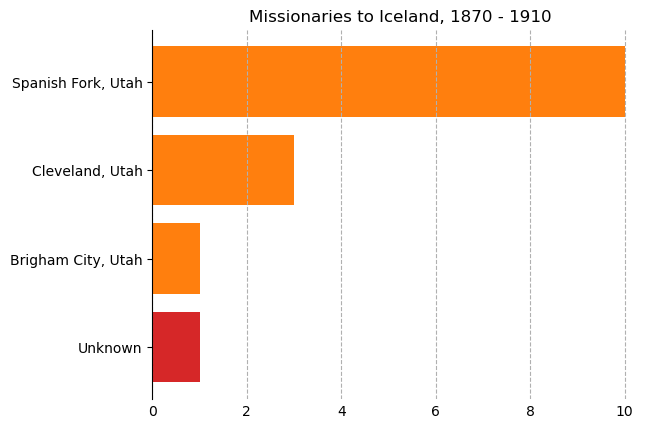

In [33]:
cities = ["Spanish Fork, Utah", "Cleveland, Utah", "Brigham City, Utah", "Unknown"]
counts = [10, 3, 1, 1]
colors = ["tab:orange"] * 3 + ["tab:red"]

fig, ax = plt.subplots()
ax.barh(cities[::-1], counts[::-1], color = colors[::-1])

ax.spines[["right", "top", "bottom"]].set_visible(False)
ax.tick_params(axis="x", length = 0)
ax.grid(axis="x", linestyle="--")

ax.set_title("Missionaries to Iceland, 1870 - 1910")

plt.show()

### Filter by Birth Place

In [43]:
df["birth_place"] = df["birth_place"].apply(lambda x: str(x).lower())

df_wales = df[(df["birth_place"].str.contains("wales"))]

print(len(df_wales))
df_wales

382


,name,birth_place,mission,loc_served,year,type,residence,url,new_residence,City,County,State,Country,Category,Subcategory,latitude,longitude,Subsubcategory,mission_region
996,John Westwood,"ebbw vale, monmouth wales, england",Northern States Mission,northern states,1905,NaN,"Circleville, Piute, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Circleville, Piute, Utah, United States",Circleville,Piute,Utah,United States,United States,Utah,38.171625,-112.270600,"Piute, Utah",United States
1090,John Evans Rees,"merthyr tydfil, glamorgan, wales, united kingdom",British Mission,"glamorgan, welsh conference, wales",1872,Proselytizing,"Sanpete, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Sanpete, Utah, United States",nan,Sanpete,Utah,United States,United States,Utah,NaN,NaN,"Sanpete, Utah",Outside US
1311,Thomas Bowen Davis,"glamorgan, wales, united kingdom",British Mission,"pontypridd, wales, welsh conference",1887,Proselytizing,"Greenville, Beaver, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Greenville, Beaver, Utah, United States",Greenville,Beaver,Utah,United States,United States,Utah,38.254415,-112.712443,"Beaver, Utah",Outside US
1569,Mormon Vernon Selman,"whitchurch, glamorgan, wales, united kingdom",Unspecified Native American Mission,"inianola, sanpete, utah",1877,Proselytizing,"Payson, Utah, Utah Territory, United States",https://history.churchofjesuschrist.org/chd/in...,"Payson, Utah, Utah, United States",Payson,Utah,Utah,United States,United States,Utah,40.044399,-111.732152,"Utah, Utah",United States
2047,Peter Evans,"llanrwst, denbighshire, wales, united kingdom",British Mission,north wales conference,1870,Proselytizing,"Salt Lake City, Salt Lake, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Salt Lake City, Salt Lake, Utah, United States",Salt Lake City,Salt Lake,Utah,United States,United States,Utah,40.759620,-111.886797,"Salt Lake, Utah",Outside US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47550,"Thomas Biggs, Jr.","garndiffaith, monmouthshire, wales, united kin...",British Mission,"welsh conference, wales.",1925,Proselytizing,"Carbon, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Carbon, Utah, United States",nan,Carbon,Utah,United States,United States,Utah,NaN,NaN,"Carbon, Utah",Outside US
47839,Benjamin Bennett,"connah's quay, flintshire, wales",British Mission,great britain,1882,NaN,"Holden, Millard, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Holden, Millard, Utah, United States",Holden,Millard,Utah,United States,United States,Utah,39.098851,-112.270770,"Millard, Utah",Outside US
47841,John Lloyd,"aberkenfig, glamorganshire, wales",British Mission,"welsh conference, wales",1896,Proselytizing,"Sandy, Salt Lake, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Sandy, Salt Lake, Utah, United States",Sandy,Salt Lake,Utah,United States,United States,Utah,40.571045,-111.895381,"Salt Lake, Utah",Outside US
47980,John G Jones,"llanelly, breconshire, wales, united kingdom",British Mission,"welsh conference, wales",1878,Proselytizing,"Provo, Utah, Utah Territory, United States",https://history.churchofjesuschrist.org/chd/in...,"Provo, Utah, Utah, United States",Provo,Utah,Utah,United States,United States,Utah,40.233729,-111.658709,"Utah, Utah",Outside US


In [44]:
missions = sorted(list(set(list(df_wales["mission"]))))
for m in missions:
    print(m)

Australasian Mission
Australian Mission
British Mission
California Mission
Central States Mission
Colorado Mission
Danish-Norwegian Mission
Early Church Mission: North America 
East Central States Mission
Eastern States Mission
Elk Mountain Mission
European Mission
French Mission
German Mission
Hawaiian Mission
Indian Territory Mission
Middle States Mission
Midwives and Nurses Mission
New Zealand Mission
North Central States Mission
Northern States Mission
Northwestern States (Pacific) Mission
Salmon River Mission
Southern States Mission
Swiss and German Mission
The Tabernacle Choir at Temple Square Mission
Unspecified Native American Mission
Welsh Mission
Western States Mission
White Mountain Mission


In [45]:
missions = sorted(list(set(list(df_wales[df_wales["mission"] == "British Mission"]["loc_served"]))))
for m in missions:
    print(m)


birmingham and welsh conferences
birmingham conference
birmingham conference, england
brechfa, carmarthenshire, wales, great britain
bristol conference, england and welsh conference, wales.
bristol conference, england and welsh district, wales
bristol conference, england and welsh district, wales.
british
british conference
cardiff, wales, welsh conference
cardiff, wales, welsh conference.
cardiganshire and carmarthenshire, wales, welsh conference
cardiganshire and carmarthenshire, welsh conference, wales
cardiganshire, carmarthenshire, and pembrokeshire, welsh conference
cardiganshire, wales
carmarthenshire and glamorganshire, wales, welsh conference.
carmarthenshire, south wales
carmarthenshire, wales, welsh conference.
carmarthenshire, wales. presided over welsh conference.
dublin, ireland
england
england/wales
europe
flintshire, wales, welsh conference.
glamorgan conference, wales
glamorgan, welsh conference, wales
glamorganshire, wales, welsh conference.
great britain
great britai

In [46]:
df_wales_filter = df_wales[(df_wales["loc_served"].str.contains("wales")) | (df_wales["loc_served"].str.contains("welsh")) | (df_wales["mission"] == "Welsh Mission")]

print(len(df_wales_filter))
df_wales_filter

192


,name,birth_place,mission,loc_served,year,type,residence,url,new_residence,City,County,State,Country,Category,Subcategory,latitude,longitude,Subsubcategory,mission_region
1090,John Evans Rees,"merthyr tydfil, glamorgan, wales, united kingdom",British Mission,"glamorgan, welsh conference, wales",1872,Proselytizing,"Sanpete, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Sanpete, Utah, United States",nan,Sanpete,Utah,United States,United States,Utah,NaN,NaN,"Sanpete, Utah",Outside US
1311,Thomas Bowen Davis,"glamorgan, wales, united kingdom",British Mission,"pontypridd, wales, welsh conference",1887,Proselytizing,"Greenville, Beaver, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Greenville, Beaver, Utah, United States",Greenville,Beaver,Utah,United States,United States,Utah,38.254415,-112.712443,"Beaver, Utah",Outside US
2047,Peter Evans,"llanrwst, denbighshire, wales, united kingdom",British Mission,north wales conference,1870,Proselytizing,"Salt Lake City, Salt Lake, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Salt Lake City, Salt Lake, Utah, United States",Salt Lake City,Salt Lake,Utah,United States,United States,Utah,40.759620,-111.886797,"Salt Lake, Utah",Outside US
2140,William Jones,"pencader, carmarthenshire, wales, united kingdom",British Mission,"leeds conference, england and welsh conference...",1894,Proselytizing,"Almo, Cassia, Idaho, United States",https://history.churchofjesuschrist.org/chd/in...,"Almo, Cassia, Idaho, United States",Almo,Cassia,Idaho,United States,United States,Idaho,42.100192,-113.633619,"Cassia, Idaho",Outside US
2405,William David Williams,"rhyl, flintshire, north wales, united kingdom",British Mission,"welsh district president, wales",1864,Proselytizing,"Ogden, Weber, Utah Territory, United States",https://history.churchofjesuschrist.org/chd/in...,"Ogden, Weber, Utah, United States",Ogden,Weber,Utah,United States,United States,Utah,41.223005,-111.973843,"Weber, Utah",Outside US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46115,Richard Jenkins Davis,"ystrad-dyfodwg, glamorgan, wales, united kingdom",British Mission,"carmarthenshire, wales, welsh conference.",1865,Proselytizing,"Willard, Box Elder, Utah Territory, United States",https://history.churchofjesuschrist.org/chd/in...,"Willard, Box Elder, Utah, United States",Willard,Box Elder,Utah,United States,United States,Utah,41.409200,-112.035300,"Box Elder, Utah",Outside US
46144,John Gibby,"haverfordwest, pembrokeshire, wales, united ki...",British Mission,wales,1890,Proselytizing,"Round Valley, Morgan, Utah Territory, United S...",https://history.churchofjesuschrist.org/chd/in...,"Round Valley, Rich, Utah, United States",Round Valley,Rich,Utah,United States,United States,Utah,41.785387,-111.366131,"Rich, Utah",Outside US
47550,"Thomas Biggs, Jr.","garndiffaith, monmouthshire, wales, united kin...",British Mission,"welsh conference, wales.",1925,Proselytizing,"Carbon, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Carbon, Utah, United States",nan,Carbon,Utah,United States,United States,Utah,NaN,NaN,"Carbon, Utah",Outside US
47841,John Lloyd,"aberkenfig, glamorganshire, wales",British Mission,"welsh conference, wales",1896,Proselytizing,"Sandy, Salt Lake, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Sandy, Salt Lake, Utah, United States",Sandy,Salt Lake,Utah,United States,United States,Utah,40.571045,-111.895381,"Salt Lake, Utah",Outside US


In [47]:
print(len(df_wales[df_wales["year"] <= 1900]))

print(len(df_wales_filter[df_wales_filter["year"] <= 1900]))

281
172


In [48]:
df_wales_filter = df_wales[(df_wales["loc_served"].str.contains("wales")) | (df_wales["loc_served"].str.contains("welsh")) | (df_wales["mission"] == "Welsh Mission") | (df_wales["mission"] == "British Mission")]
print(len(df_wales[df_wales["year"] <= 1900]))
print(len(df_wales_filter[df_wales_filter["year"] <= 1900]))

281
221


In [ ]:
df_wales = df[(df["birth_place"].str.contains("wales"))]
df_wales_filter = df_wales[(df_wales["loc_served"].str.contains("wales")) | (df_wales["mission"] == "Welsh Mission")]

print(len(df_wales_filter))
df_wales_filter

In [42]:
## Scotland

df_wales = df[(df["birth_place"].str.contains("scotland"))]
df_wales_filter = df_wales[(df_wales["loc_served"].str.contains("scotland")) | (df_wales["loc_served"].str.contains("scottish"))  | (df_wales["loc_served"].str.contains("glasgow"))]

print(len(df_wales[df_wales["year"] <= 1900]))
print(len(df_wales_filter[df_wales_filter["year"] <= 1900]))

337
64


In [38]:
df_wales

,name,birth_place,mission,loc_served,year,type,residence,url,new_residence,City,County,State,Country,Category,Subcategory,latitude,longitude,Subsubcategory,mission_region
137,David Wilson Tullis,"cupar, fife, scotland, united kingdom",British Mission,great britain,1882,Proselytizing,"Pinto, Washington, Utah Territory, United States",https://history.churchofjesuschrist.org/chd/in...,"Pinto, Washington, Utah, United States",Pinto,Washington,Utah,United States,United States,Utah,37.570551,-113.521494,"Washington, Utah",Outside US
202,Arthur Louis Fitzgerald MacDermott,"montrose, angus, scotland",British Mission,great britain,1900,Proselytizing,"Monticello, San Juan, Colorado, United States",https://history.churchofjesuschrist.org/chd/in...,"Monticello, San Juan, Utah, United States",Monticello,San Juan,Utah,United States,United States,Utah,37.875056,-109.340315,"San Juan, Utah",Outside US
413,"George Condie, Jr.","clackmanunknown, clackmanunknownshire, scotlan...",British Mission,great britain,1883,Proselytizing,"Hamiltons Fort, Iron, Utah Territory, United S...",https://history.churchofjesuschrist.org/chd/in...,"Hamiltons Fort, Iron, Utah, United States",Hamiltons Fort,Iron,Utah,United States,United States,Utah,37.628407,-113.131714,"Iron, Utah",Outside US
472,"James Ross Smith, Sr.","lonehead, edinburgh, scotland",British Mission,great britain,1889,Proselytizing,"Sugar House Ward, Salt Lake, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Salt Lake City, Salt Lake, Utah, United States",Salt Lake City,Salt Lake,Utah,United States,United States,Utah,40.759620,-111.886797,"Salt Lake, Utah",Outside US
983,John Cunningham Bell,"cappers, lanarkshire, scotland",British Mission,british,1922,NaN,"Mountainville, Sanpete, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Mount Pleasant, Sanpete, Utah, United States",Mount Pleasant,Sanpete,Utah,United States,United States,Utah,39.546907,-111.455465,"Sanpete, Utah",Outside US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48018,Francis McDonald,"middleton, lintrathan, forfor, scotland, unite...",Southern States Mission,kentucky conference,1879,Proselytizing,"Cottonwood, Salt Lake, Utah Territory, United ...",https://history.churchofjesuschrist.org/chd/in...,"Murray, Salt Lake, Utah, United States",Murray,Salt Lake,Utah,United States,United States,Utah,40.666784,-111.888417,"Salt Lake, Utah",United States
48019,Francis McDonald,"middleton, lintrathan, forfor, scotland, unite...",Western States Mission,western states,1919,Proselytizing,"Salt Lake City, Salt Lake, Utah, United States",https://history.churchofjesuschrist.org/chd/in...,"Salt Lake City, Salt Lake, Utah, United States",Salt Lake City,Salt Lake,Utah,United States,United States,Utah,40.759620,-111.886797,"Salt Lake, Utah",United States
48052,John Maxwell,"kirkfield bank, lesanhago, lanarkshire, scotland",European Mission,europe,1857,Proselytizing,"Bountiful, Davis, Utah Territory, United States",https://history.churchofjesuschrist.org/chd/in...,"Bountiful, Davis, Utah, United States",Bountiful,Davis,Utah,United States,United States,Utah,40.889461,-111.880482,"Davis, Utah",Outside US
48174,Angus McDonald,"inverness-shire, scotland, united kingdom",Eastern States Mission,united states,1869,Proselytizing,"Box Elder, Utah Territory, United States",https://history.churchofjesuschrist.org/chd/in...,"Box Elder, Utah, United States",nan,Box Elder,Utah,United States,United States,Utah,NaN,NaN,"Box Elder, Utah",United States


In [39]:
# Including british mission in results

## Scotland

df_wales = df[(df["birth_place"].str.contains("scotland"))]
df_wales_filter = df_wales[(df_wales["loc_served"].str.contains("scotland")) | (df_wales["loc_served"].str.contains("scottish")) | (df_wales["mission"].str.contains("British Mission"))]

print(len(df_wales[df_wales["year"] <= 1900]))
print(len(df_wales_filter[df_wales_filter["year"] <= 1900]))

337
217


In [40]:
missions = sorted(list(set(list(df_wales["mission"]))))
for m in missions:
    print(m)


Australasian Mission
Australian Mission
British Mission
California Mission
Central States Mission
Colorado Mission
Early Church Mission: North America 
East Indian Mission
Eastern States Mission
European Mission
Hawaiian Mission
Hong Kong Mission
Indian Territory Mission
Italian Mission
Mexican Mission
Midwives and Nurses Mission
Montana Mission
Netherlands Mission
New Zealand Mission
North Central States Mission
Northern States Mission
Northwestern States (Pacific) Mission
Salmon River Mission
Samoan Mission
Shoshone Mission
South African Mission
Southern States Mission
Southern Utah Mission
Tahitian Mission
The Tabernacle Choir at Temple Square Mission
Unspecified Native American Mission
Western States Mission


In [41]:
missions = sorted(list(set(list(df_wales[df_wales["mission"] == "British Mission"]["loc_served"]))))
for m in missions:
    print(m)


britain
british
british isles
british mission (1837)
cardiff, welsh district, wales and scottish conference, scotland.
edinbugh, glasgow, sterling, linlithgow, dunbartonshire.
england
england and switzerland
england, bedfordshire conference
england, europe
england, scotland and wales
europe
europe eng
fife, scotland
glasgow and dundee conferences, scotland
glasgow and irish
glasgow conference
great britain
great britain, lancashire
great britain, scotland
great britian
irish and scottish conferences
irish conference
irish conference and bristol, england conference and welsh district.
leeds district, england and scottish district, scotland.
liverpool conference; scotland
liverpool, england
london district, england and scottish district, glasgow, scotland.
manchester and liverpool conferences
mission office
nan
newcastle conference
northumberland, england
scotland
scotland & england
scotland and great britain
scotland genealogical
scotland, belfast conference
scotland, united kingdom
sco

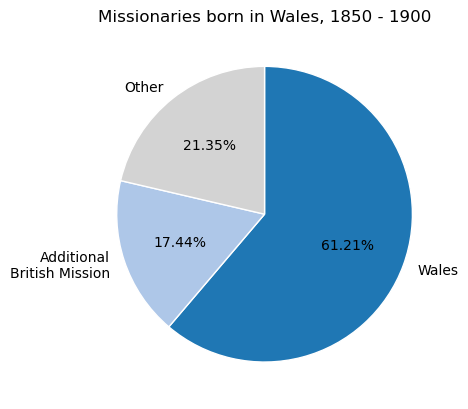

In [68]:
# Wales pie chart

cmap = plt.get_cmap("tab20")

# to wales, to GB, to other places
labels = ["Wales", "Additional\nBritish Mission", "Other"]

sizes = [172 / 281 * 100, (221 - 172) / 281 * 100, (281 - 221) / 281 * 100]
colors = [cmap(0.01), cmap(0.06), "lightgray"]


fig, ax = plt.subplots()
ax.pie(sizes, colors = colors, startangle=90, counterclock=False, labels = labels,
       wedgeprops={'edgecolor': 'white', 'linewidth': 1}, autopct='%1.2f%%')

ax.set_title("Missionaries born in Wales, 1850 - 1900")

plt.show()

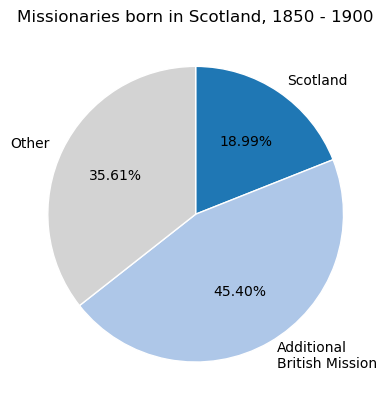

In [69]:
# Wales pie chart

cmap = plt.get_cmap("tab20")

# to wales, to GB, to other places
labels = ["Scotland", "Additional\nBritish Mission", "Other"]

sizes = [64 / 337 * 100, (217 - 64) / 337 * 100, (337 - 217) / 337 * 100]
colors = [cmap(0.01), cmap(0.06), "lightgray"]


fig, ax = plt.subplots()
ax.pie(sizes, colors = colors, startangle=90, counterclock=False, labels = labels,
       wedgeprops={'edgecolor': 'white', 'linewidth': 1}, autopct='%1.2f%%')

ax.set_title("Missionaries born in Scotland, 1850 - 1900")


plt.show()